In [6]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


# 간단 패션 MNIST

In [29]:
# 필요 모듈 임포트# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# ① 문제와 정답 데이터 지정
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 10 개의 분류 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 데이터 전처리
# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

In [40]:
# ② 모델 구성(생성)
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [41]:
# ④ 생성된 모델로 훈련 데이터 학습
# 모델을 훈련 데이터로 총 5번 훈련
model.fit(train_images, train_labels, epochs=8)

# ⑤ 테스트 데이터로 성능 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4751 - accuracy: 0.8266
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3598 - accuracy: 0.8669
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3264 - accuracy: 0.8801
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.8868
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8944
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.8981
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9038
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9064
313/313 - 1s - loss: 0.3596 - accuracy: 0.8726

테스트 정확도: 0.8726000189781189


# MNIST 패션 이해를 위한 다양한 구현

In [30]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [44]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
print(train_labels[0])
print(class_names[train_labels[0]])

9
Ankle boot


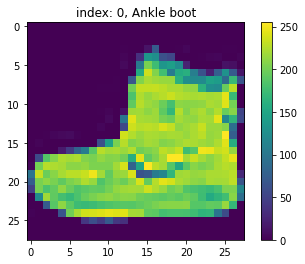

In [49]:
# 첫번째 훈련 데이터 그림
plt.figure()
plt.imshow(train_images[0])
plt.title('index: 0, ' + class_names[train_labels[0]])
plt.colorbar()
plt.show()

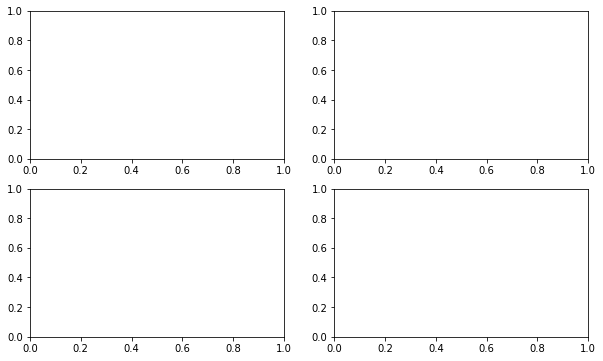

In [52]:
plt.figure(figsize = (10, 6))

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)
plt.subplot(2, 2, 3) 
plt.subplot(2, 2, 4) 
#plt.subplot(2, 1, 1) 
#plt.subplot(2, 1, 2) 

plt.show()

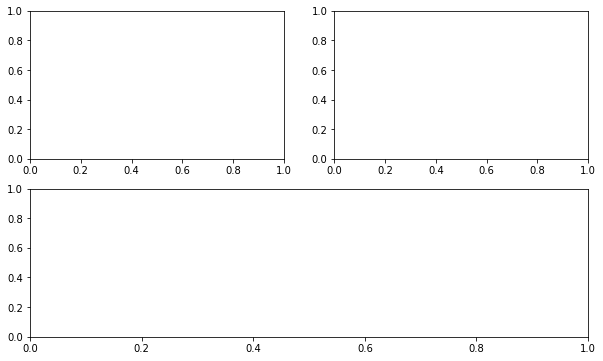

In [55]:
plt.figure(figsize = (10, 6))

plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)
#2행 1열로 잡은 공간에 2번째로 지정하게 되면서 위 그림 상 밑에 긴 plot 공간이 잡함 
#plt.subplot(2, 1, 1) 
plt.subplot(2, 1, 2) 

plt.show()

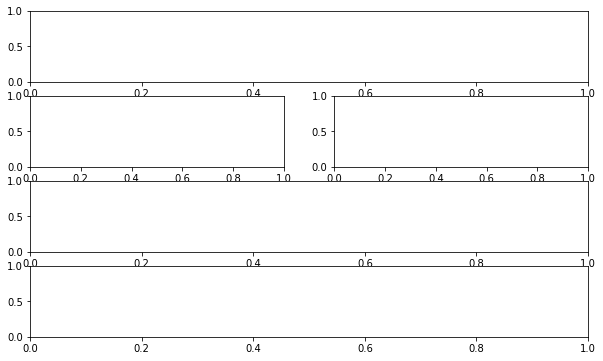

In [58]:
plt.figure(figsize = (10, 6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(425)
plt.subplot(426)
plt.subplot(413)
plt.subplot(414)

plt.show()

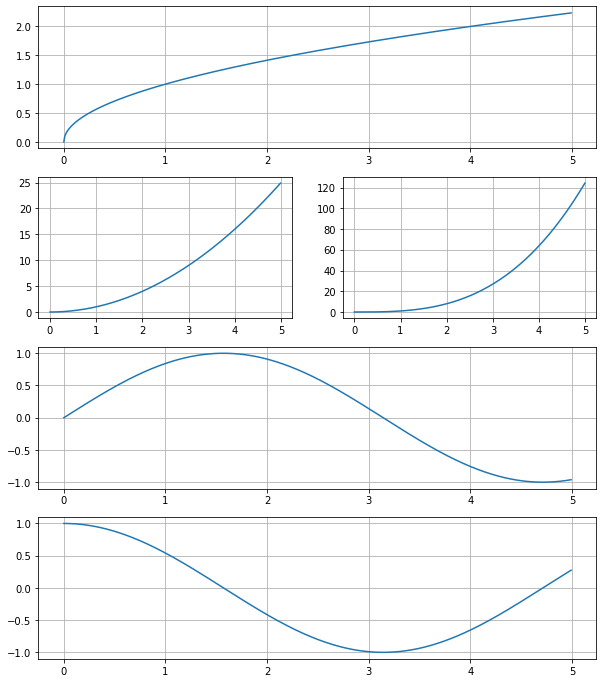

In [59]:
import numpy as np

x = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(x, np.sqrt(x))
plt.grid()

plt.subplot(423)
plt.plot(x, x**2)
plt.grid()

plt.subplot(424)
plt.plot(x, x**3)
plt.grid()

plt.subplot(413)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(414)
plt.plot(x, np.cos(x))
plt.grid()

plt.show()

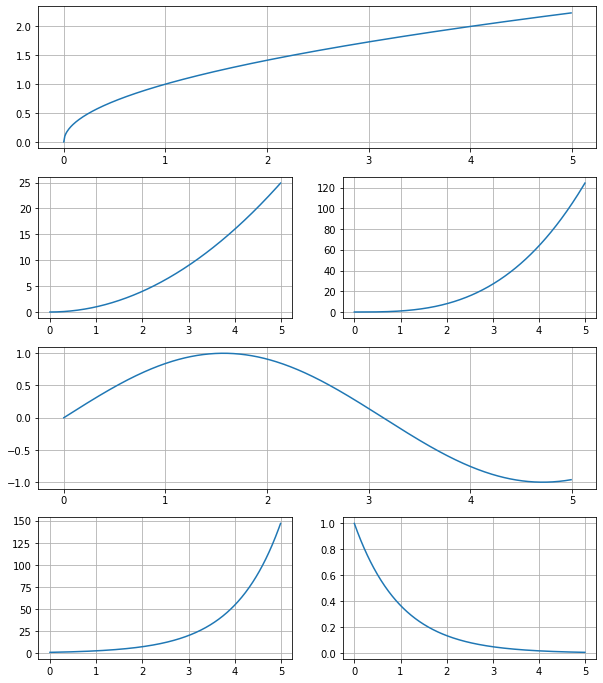

In [34]:
import numpy as np

x = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(411)
plt.plot(x, np.sqrt(x))
plt.grid()

plt.subplot(423)
plt.plot(x, x**2)
plt.grid()

plt.subplot(424)
plt.plot(x, x**3)
plt.grid()

plt.subplot(413)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(414)
plt.plot(x, np.cos(x))
plt.grid()

plt.subplot(427)
plt.plot(x, np.exp(x))
plt.grid()

plt.subplot(4, 2, 8)
plt.plot(x, np.exp(-x))
plt.grid()

plt.show()

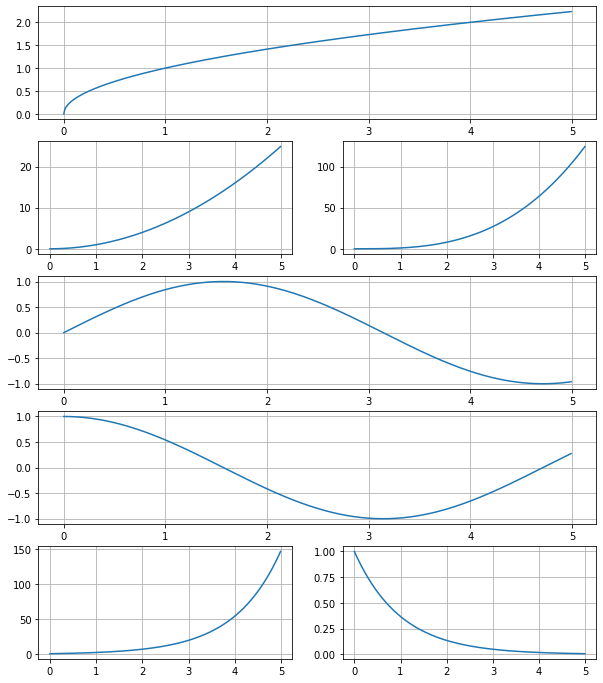

In [ ]:
import numpy as np

x = np.arange(0, 5, 0.01)

plt.figure(figsize=(10, 12))

plt.subplot(511)
plt.plot(x, np.sqrt(x))
plt.grid()

plt.subplot(523)
plt.plot(x, x**2)
plt.grid()

plt.subplot(524)
plt.plot(x, x**3)
plt.grid()

plt.subplot(513)
plt.plot(x, np.sin(x))
plt.grid()

plt.subplot(514)
plt.plot(x, np.cos(x))
plt.grid()


plt.subplot(529)
plt.plot(x, np.exp(x))
plt.grid()


plt.subplot(5, 2, 10)
plt.plot(x, np.exp(-x))
plt.grid()

plt.show()

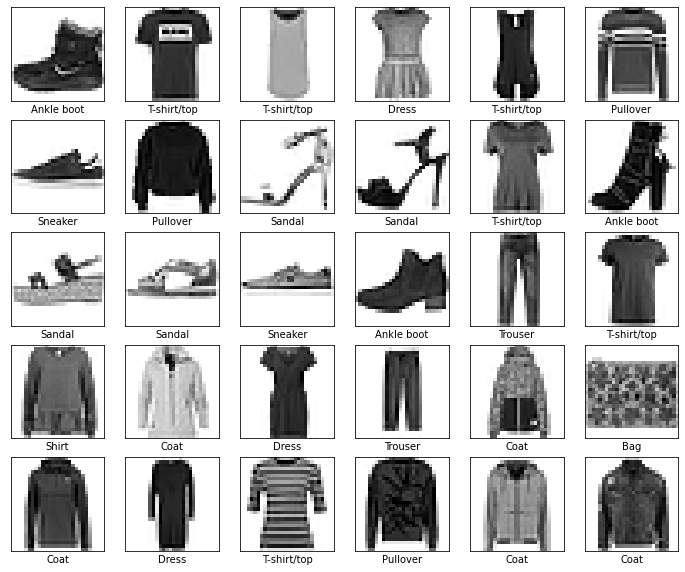

In [32]:
# 첫 30개의 훈련용 자료를 그려 보자.
plt.figure(figsize = (12, 10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

[1180, 2030, 6622, 7234, 7704, 8281, 9465, 10276, 14241, 14360, 18305, 19442, 20146, 20266, 21604, 21919, 22472, 25149, 26360, 27860, 29280, 35943, 36701, 43542, 45175, 48293, 48626, 54057, 57938, 59791]


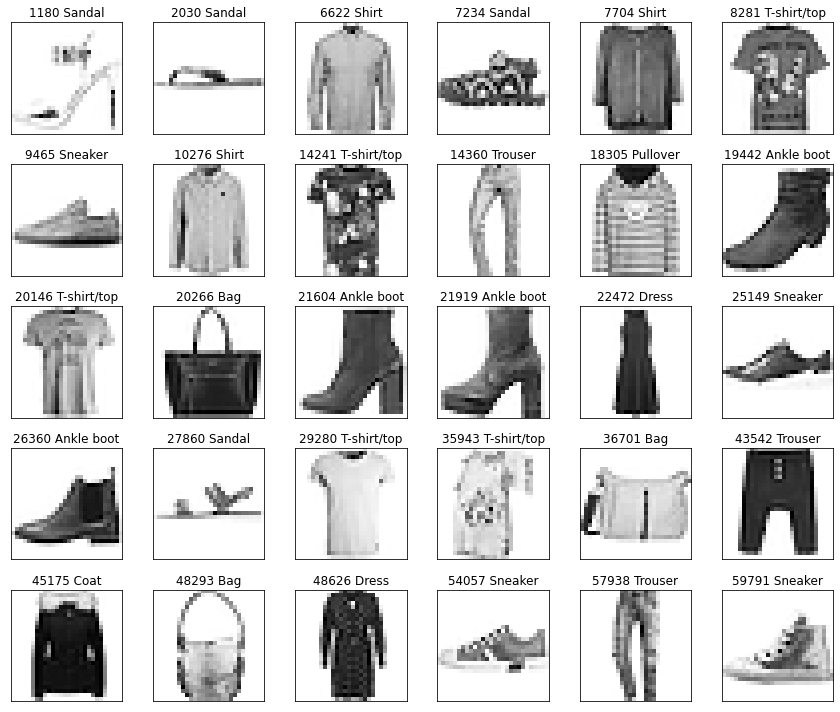

In [63]:
# 랜덤하게 30개의 훈련용 자료를 그려 보자.
from random import sample

rows, cols = 5, 6 #츨력 가로 세로 수
idx = sorted(sample(range(len(train_images)), rows * cols)) # 출력할 첨자 선정
print(idx)

cnt = 0
plt.figure(figsize=(12, 10))

for i in idx:
    cnt += 1
    plt.subplot(rows, cols, cnt)
    tmp = str(i) + ' ' + str(class_names[train_labels[i]])
    plt.title(tmp)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='Greys')

plt.tight_layout()
plt.show()

In [33]:
train_images, test_images = train_images / 255.0, test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose = 3)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5259 - accuracy: 0.8090 - val_loss: 0.4443 - val_accuracy: 0.8440
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8593 - val_loss: 0.3749 - val_accuracy: 0.8727
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3512 - accuracy: 0.8728 - val_loss: 0.3553 - val_accuracy: 0.8717
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3255 - accuracy: 0.8813 - val_loss: 0.3665 - val_accuracy: 0.8645
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3096 - accuracy: 0.8857 - val_loss: 0.3402 - val_accuracy: 0.8769
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2912 - accuracy: 0.8933 - val_loss: 0.3503 - val_accuracy: 0.8750
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8964 - val_loss: 0.3367 - val_accuracy:

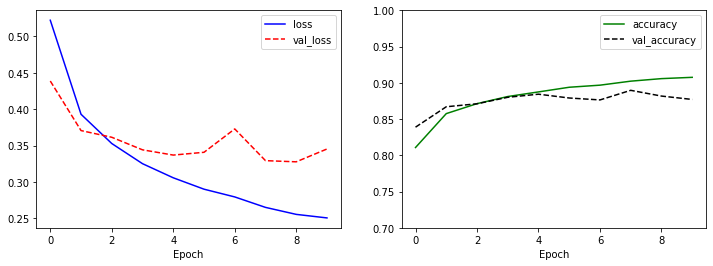

In [65]:
# Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

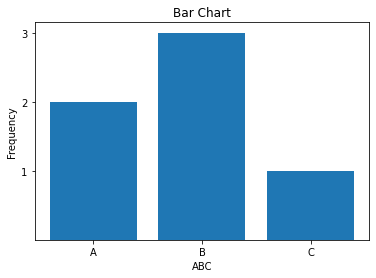

In [66]:
import matplotlib as mpl
import matplotlib.pylab as plt

# 한글 처리
'''
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
'''

y = [2, 3, 1]
x = np.arange(len(y))
# xlabel = ['가', '나', '다']
xlabel = ['A', 'B', 'C']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
# plt.xlabel("가나다")
# plt.ylabel("빈도 수")
plt.xlabel("ABC")
plt.ylabel("Frequency")
plt.show()

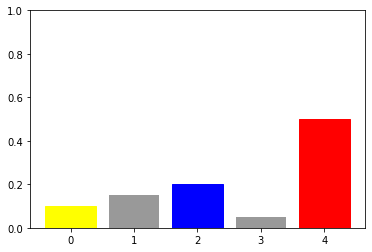

In [11]:
predictions_array = [.1, .15, .2, .05, .5]
predicted_label = np.argmax(predictions_array) # 4
true_label = 2;

# 막대 그래프 그리기 (x, y, 막대 색상)
thisplot = plt.bar(range(5), predictions_array, color="#999999")
# 부분 막대의 색상 수정
thisplot[0].set_color('yellow')
thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')

plt.ylim([0, 1])
plt.show()

In [34]:
# 이미지 그리기(첨자, 예측(확률 값), 결과(일반숫자), 이미지)
# 하단에 예측한 이름과 확률을 출력(정답이면 파란색, 오답이면 빨간색)
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    #plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    predicted_label = np.argmax(predictions_array) #예측한 확률 값 추출
    # 하단 X 축 글: 정답이면 파란색, 오답이면 빨간색으로 그리기
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    maxprob = np.max(predictions_array) # 예측의 최대 확률 값
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
               100 * maxprob, class_names[true_label]), color = color)
    
    plt.imshow(img, cmap = plt.cm.binary)

In [35]:
# 예측 값을 막대그래프로 그리기(정답이면 파란색, 오답이면 빨간색)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    #plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    thisplot = plt.bar(range(10), predictions_array, color="#447777")
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    # X  레이블을 그리기 위해 
    x = np.arange(10)
    # 레이블 0~9 숫자 출력
    #xlabel = np.arange(10) 
    #plt.xticks(x, xlabel)
    # 각 종류 레이블을 직접 세로로 출력
    plt.xticks(x, class_names, rotation='45')
    #plt.xticks(x, class_names, rotation='vers45')

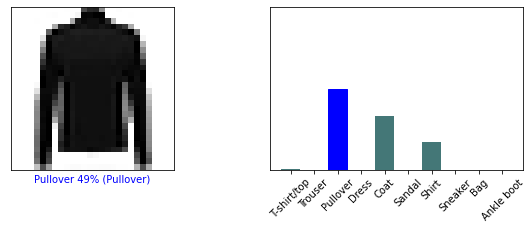

In [36]:
# 테스트 데이터의 첫번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
predictions = model.predict(test_images)

i = 255
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [37]:
# 예측 값을 막대그래프로 그리기(정답이면 파란색, 오답이면 빨간색)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    #plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    thisplot = plt.bar(range(10), predictions_array, color="#447777")
    
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    # X  레이블을 그리기 위해 
    x = np.arange(10)
    # 레이블 0~9 숫자 출력
    xlabel = np.arange(10) 
    plt.xticks(x, xlabel)

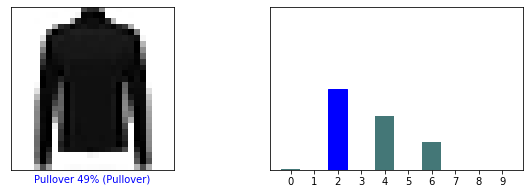

In [38]:
# 테스트 데이터의 첫번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인
predictions = model.predict(test_images)

i = 255
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

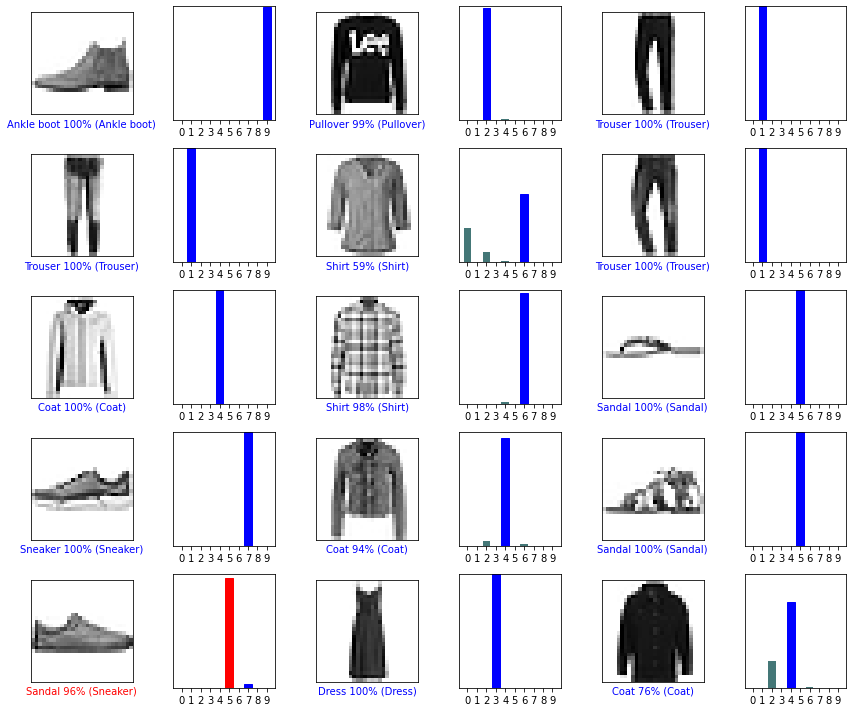

In [17]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.tight_layout()
plt.show()

정답이 틀린 수 1257
[722, 809, 860, 1620, 1659, 1814, 1861, 1968, 2020, 2189, 2224, 2615, 2910, 2985, 3545, 4300, 6801, 6908, 7167, 7393, 7416, 7568, 7596, 7673, 8260, 8463, 8879, 9237, 9398, 9989]


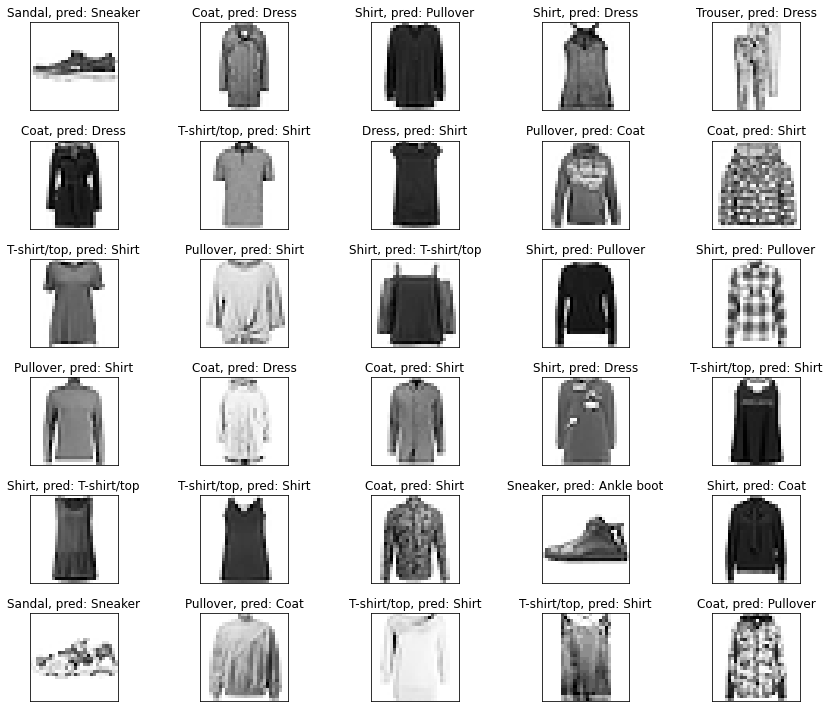

In [78]:
# 예측 틀린 것 첨자를 저장할 리스트
pred_result = model.predict(test_images)
# 원핫 인코딩을 일반 데이터로 변환
pred_labels = tf.argmax(pred_result, axis=1)

mispred = []
for i in range(0, len(test_labels)):
    if pred_labels[i] != test_labels[i]:
        mispred.append(i)
print('정답이 틀린 수', len(mispred))

# 랜덤하게 틀린 것 30개의 첨자 리스트 생성
samples = sorted(sample(mispred, 30))
print(samples)

# 틀린 것 30개 그리기
count = 0
rows, cols = 6, 5
plt.figure(figsize=(12,10))
for i in samples:
    count += 1
    plt.subplot(rows, cols, count)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = str(class_names[test_labels[i]]) + ", pred: " + str(class_names[pred_labels[i]])
    plt.title(tmp)

plt.tight_layout()
plt.show()

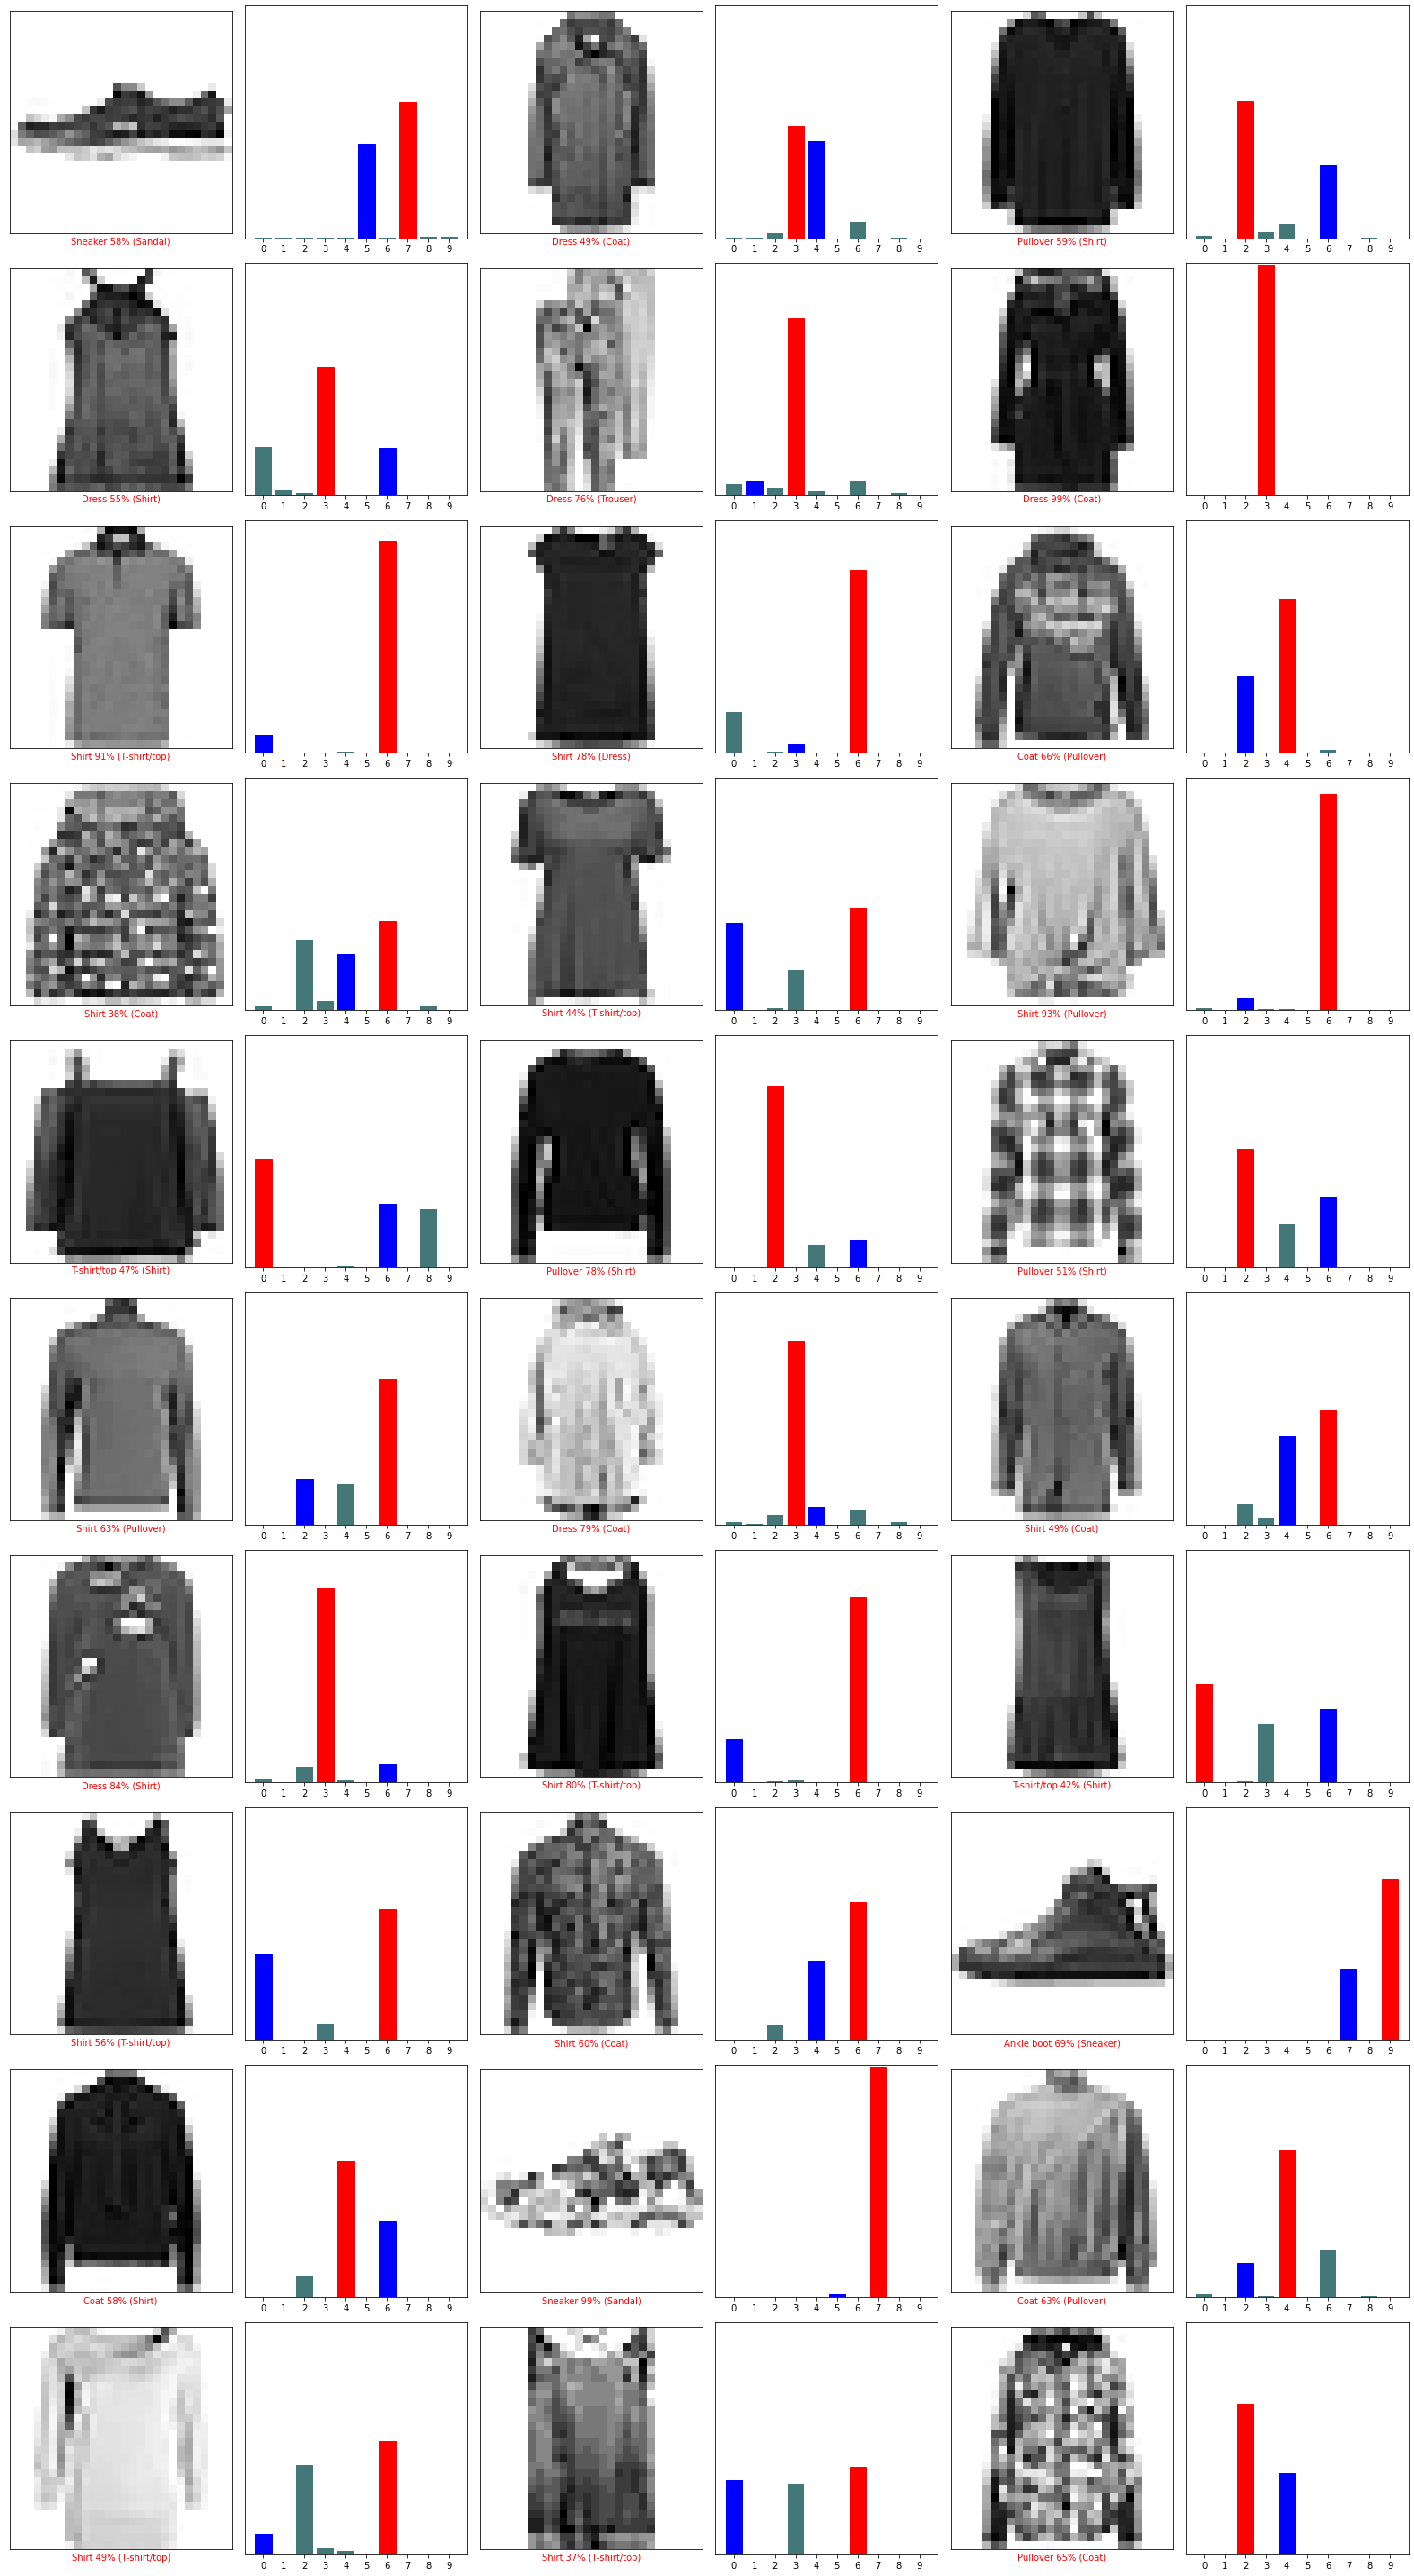

In [99]:
# 틀린 것 30개 그리기
count = 0
rows, cols = 10, 6
plt.figure(figsize=(22, 40))

for i in samples:
    count += 1
    plt.subplot(rows, cols, count)
    plot_image(i, pred_result, test_labels, test_images)
    count += 1
    plt.subplot(rows, cols, count)
    plot_value_array(i, pred_result, test_labels)

plt.tight_layout()
plt.show()

In [18]:
import tensorflow as tf

#@tf.function
def get_loss(label, prob):
    cce = tf.keras.losses.SparseCategoricalCrossentropy()
    #loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))
    loss = cce(label, prob)
    return loss 
    
print('CCE: ', get_loss([2], [[0.2, .1, .3, .4]]).numpy())
print('CCE: ', get_loss(2, [0.2, .1, .3, .4]).numpy())
print('CCE: ', get_loss(3, [0.2, .1, .3, .4]).numpy())
print('CCE: ', get_loss(5, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06,
 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())
print('CCE: ', get_loss(9, [3.5794352e-07, 1.6668336e-09, 1.2257135e-07, 3.7462252e-07, 4.4686758e-06,
 6.8782866e-02, 1.0355227e-06, 5.1593245e-04, 2.1532403e-09, 9.3069482e-01]).numpy())

CCE:  1.2039728
CCE:  1.2039728
CCE:  0.91629076
CCE:  2.676801
CCE:  0.07182401


In [39]:
def get_loss(label, prob):
    cce = tf.keras.losses.SparseCategoricalCrossentropy()
    #loss = cce(tf.convert_to_tensor(label), tf.convert_to_tensor(prob))
    loss = cce(label, prob)
    return loss 

pred_labels = model.predict(test_images)

# 모든 테스트 데이터의 크로스 엔트로피 값을 저장
cces = [] 
for i in range(len(test_images)):
    cces.append(get_loss(test_labels[i], pred_labels[i]).numpy())

print(len(cces))
print(cces[:10])

10000
[0.028039496, 0.0018048679, 1.072883e-06, 1.072883e-06, 0.032450333, 1.072883e-06, 0.00047136162, 0.015659463, 1.072883e-06, 1.3470559e-05]


# 정렬의 첨자를 알아내고 이를 사용하여 정렬하는 방법 

In [20]:
import numpy as np
a = np.random.randint(0, 20, 10)
a

array([ 1,  9, 13, 15,  9,  8,  9, 19,  0,  3])

In [21]:
np.argsort(a) #오름 차순(순방향) 정렬의 첨자 값 

array([8, 0, 9, 5, 1, 4, 6, 2, 3, 7])

In [23]:
np.argsort(a)[-1]

7

In [22]:
np.argsort(-a) #내름 차순(역방향) 정렬의 첨자 값

array([7, 3, 2, 1, 4, 6, 5, 9, 0, 8])

In [24]:
np.argsort(-a)[0]

7

In [85]:
# 가장 큰 값
print(a[np.argsort(a)[-1]])
print(a[np.argsort(-a)[0]])

19
19


In [86]:
# 가장 작은 값
print(a[np.argsort(a)[0]])
print(a[np.argsort(-a)[-1]])

1
1


In [25]:
# 오름차 순으로 값 출력
for _ in range(len(a)):
    print(a[np.argsort(a)[_]], end = ' ')

0 1 3 8 9 9 9 13 15 19 

In [26]:
# 내림차 순으로 값 출력
for _ in range(len(a)):
    print(a[np.argsort(-a)[_]], end = ' ')

19 15 13 9 9 9 8 3 1 0 

In [40]:
# 예측(원핫인코딩) 값을 막대그래프로 그리기(정답이면 파란색, 오답이면 빨간색)
# X 레이블에 손실 값 CCE를 출력
def plot_value_cce_array(i, predictions_array, true_label):
    plot_value_array(i, predictions_array, true_label)    
    plt.title('CCE: ' + str(get_loss(true_label[i], predictions_array[i]).numpy()))

In [41]:
# 손실값이 큰 순으로 첨자를 저장
arycces = np.array(cces)
lst_arg = np.argsort(-arycces)

for i in range(20):
    print(cces[lst_arg[i]], end = ' ')
print()

16.118097 16.118095 16.118095 16.118095 16.118095 16.118095 16.118095 16.118095 14.506555 13.606186 12.640426 11.452513 11.171615 11.164375 10.832378 10.371697 10.211223 9.825285 9.692514 9.547813 


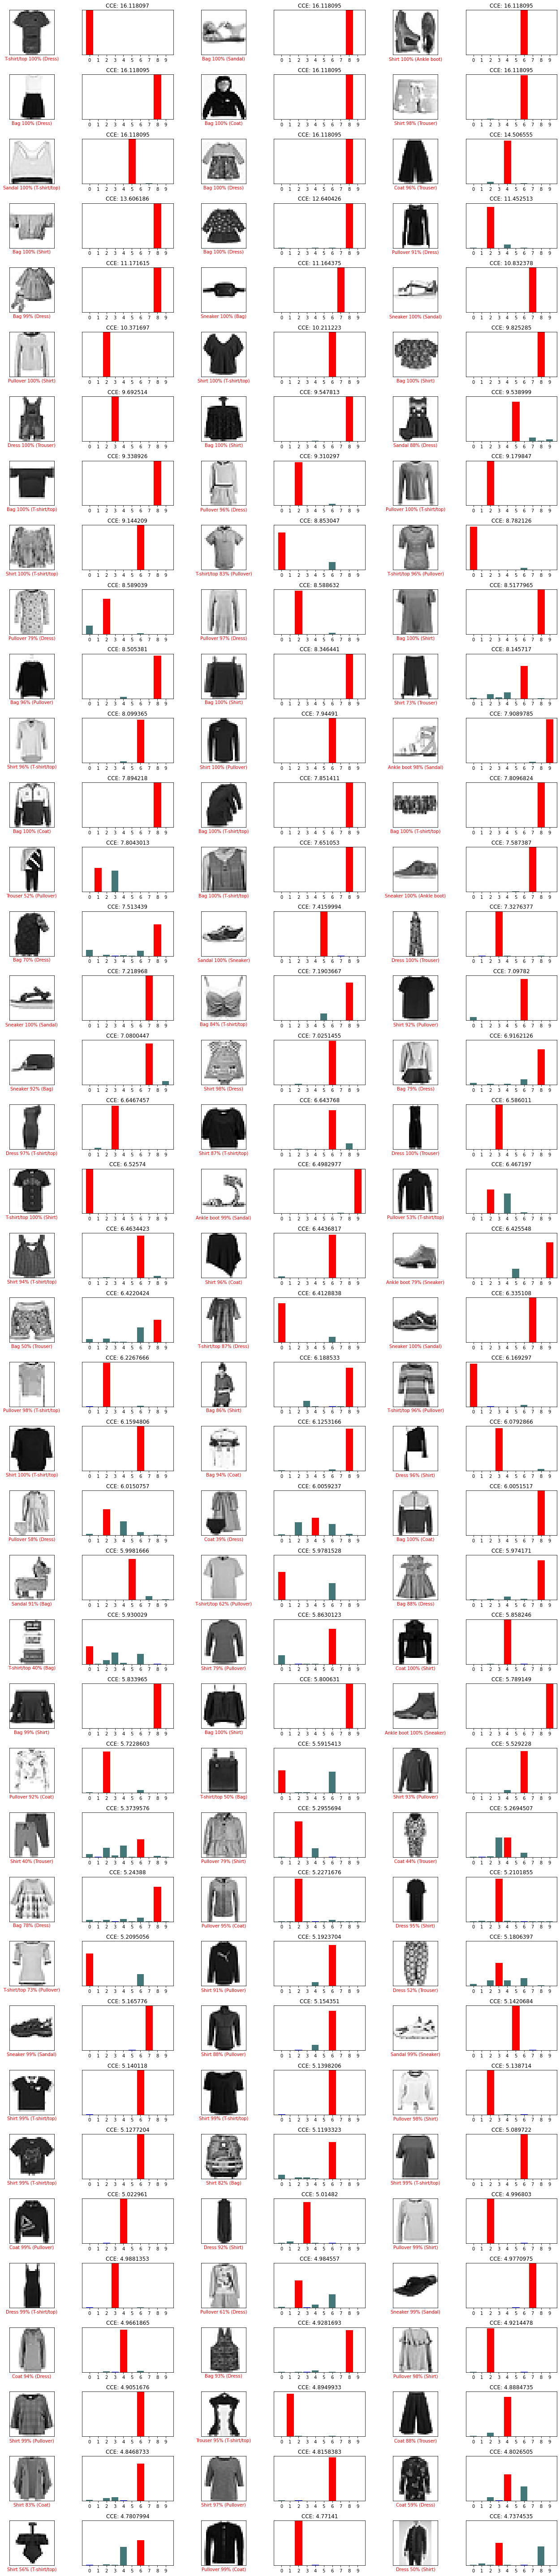

In [43]:
# 손실 값이 큰 순으로 30개를 출력
count = 0
rows, cols = 40, 6
plt.figure(figsize=(cols*3, rows*2))

for i in range(rows*3):
    count += 1
    plt.subplot(rows, cols, count)
    #plot_image(lst_arg[i], pred_result, test_labels, test_images)
    plot_image(lst_arg[i], pred_labels, test_labels, test_images)
    count += 1
    plt.subplot(rows, cols, count)
    #plot_value_cce_array(lst_arg[i], pred_result, test_labels)
    plot_value_cce_array(lst_arg[i], pred_labels, test_labels)

plt.tight_layout()
plt.show()